In [6]:
#pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np

Reading the DataSet 

In [2]:
# data_df = pd.read_csv('ASIANPAINT.csv')
# data_df

In [147]:
data_df = pd.read_csv('RELIANCE.csv')

In [148]:
data_open = data_df['Close']
data_open

0        901.207458
1        902.594299
2        906.210022
3        911.658386
4        914.580688
           ...     
1292    2247.800049
1293    2203.300049
1294    2237.550049
1295    2248.000000
1296    2234.699951
Name: Close, Length: 1297, dtype: float64

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler();
data_input = scaler.fit_transform(np.array(data_open).reshape(-1,1))
data_input.shape

(1297, 1)

In [150]:
# splitting dataset 

training_size = int(len(data_input)*0.80) # no. of instance of training set
test_size = len(data_input) - training_size # no. of instances of test set
print(test_size)
train_data , test_data = data_input[0:training_size ,:] , data_input[training_size:len(data_input),:]


260


In [151]:
train_data.shape , test_data.shape

((1037, 1), (260, 1))

In [152]:
def create_dataset(dataset , time_step=1):
    dataX , dataY = [] ,[]
    for i in range (len(dataset)-time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [153]:
time_step = 60
X_train , y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [154]:
X_train.shape

(976, 60)

In [155]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [156]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [157]:
model = Sequential();
model.add(LSTM(64,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1,activation='linear'))
model.compile(loss="mape" , optimizer='adam')

In [158]:
model.fit(X_train , y_train , validation_data=(X_test,y_test) , epochs=50 ,  batch_size=32 , verbose=1)

Epoch 1/50
31/31 [==============================] - 9s 120ms/step - loss: 67.0956 - val_loss: 49.3170
Epoch 2/50
31/31 [==============================] - 2s 78ms/step - loss: 56.0192 - val_loss: 25.6934
Epoch 3/50
31/31 [==============================] - 2s 77ms/step - loss: 43.6508 - val_loss: 8.8048
Epoch 4/50
31/31 [==============================] - 2s 75ms/step - loss: 33.8965 - val_loss: 35.2005
Epoch 5/50
31/31 [==============================] - 2s 76ms/step - loss: 28.9111 - val_loss: 16.3649
Epoch 6/50
31/31 [==============================] - 2s 78ms/step - loss: 20.6711 - val_loss: 5.8513
Epoch 7/50
31/31 [==============================] - 2s 74ms/step - loss: 26.9255 - val_loss: 10.0973
Epoch 8/50
31/31 [==============================] - 2s 77ms/step - loss: 24.4012 - val_loss: 3.5777
Epoch 9/50
31/31 [==============================] - 2s 76ms/step - loss: 18.3554 - val_loss: 4.5481
Epoch 10/50
31/31 [==============================] - 2s 78ms/step - loss: 15.3270 - val_loss: 

In [159]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [160]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

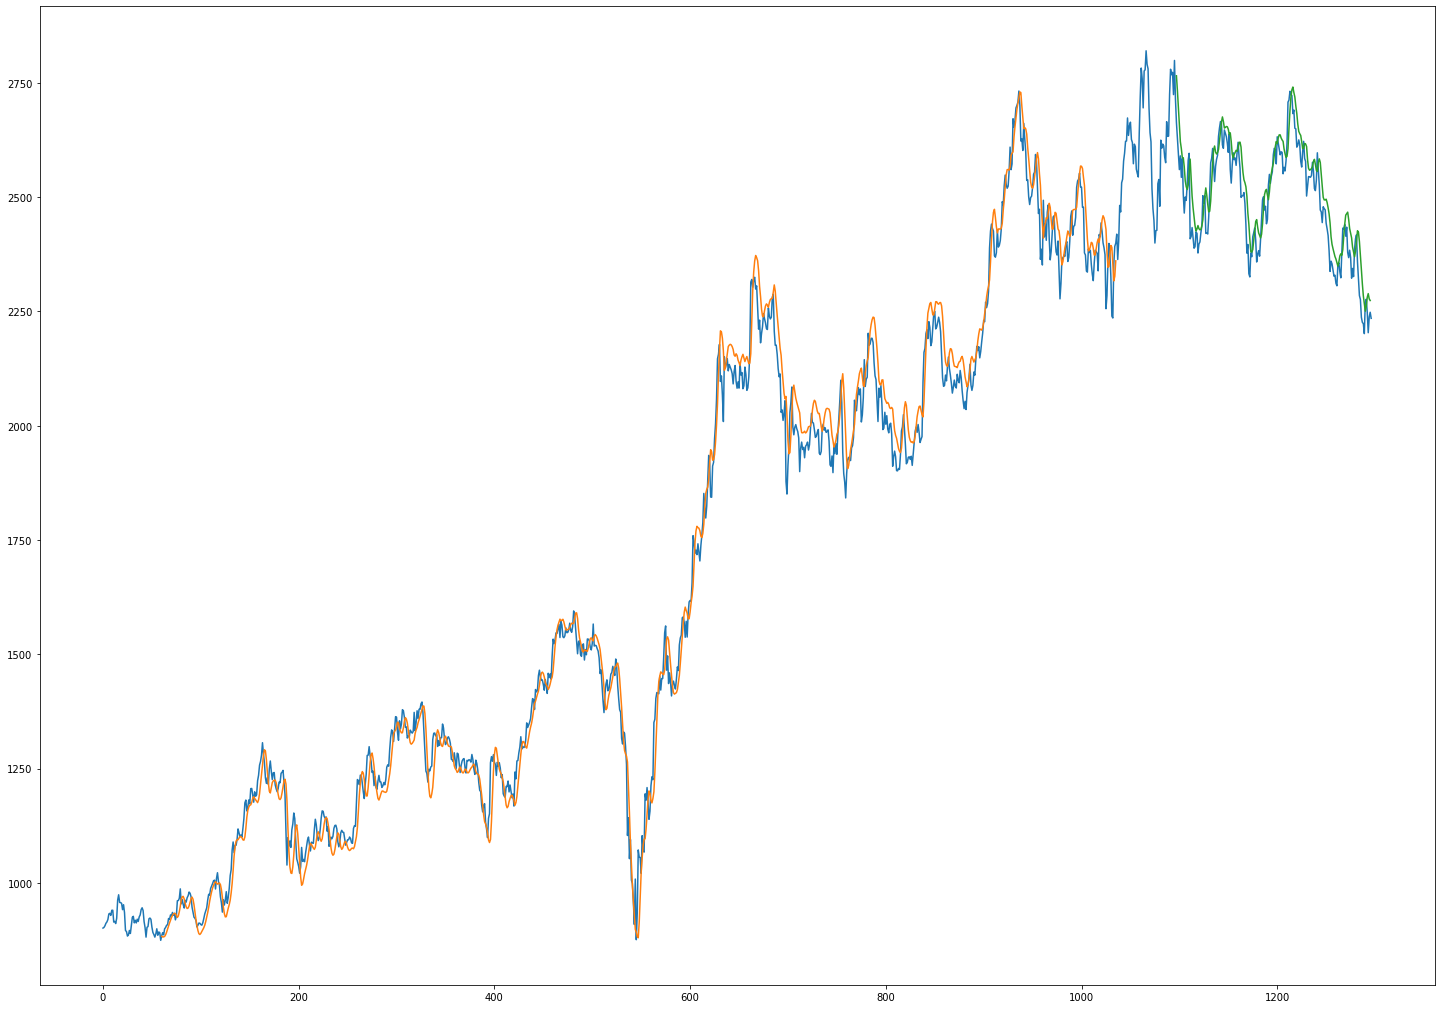

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,18)) 
look_back = 60
trainPredictPlot = np.empty_like(data_input)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_input)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+look_back*2 + 1 : len(data_input)-1,:] = test_predict

plt.plot(scaler.inverse_transform(data_input))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [162]:
testing = pd.read_csv("testing.csv")
test_60 = testing['Close']
test_60 = np.array(test_60).reshape(-1,1)

for i in range(700):
    data_input = scaler.transform(test_60[i:60+i])
    test_new = data_input.reshape(1,60,1)
    predict_new = model.predict(test_new)
    predict_new = scaler.inverse_transform(predict_new)
    test_60 = np.append(test_60 ,predict_new).reshape(-1,1)

In [168]:
# test_60 = np.append(test_60 ,[[2234.70]]).reshape(-1,1)
# test_60 = np.append(test_60 ,[[2331.05]]).reshape(-1,1)
data_input = scaler.transform(test_60[:60])
test_new = data_input.reshape(1,60,1)
predict_new = model.predict(test_new)
scaler.inverse_transform(predict_new)

array([[2276.6882]], dtype=float32)

In [163]:
import plotly.express as px
px.line(test_60)

array([[2238.9783]], dtype=float32)